In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [54]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
xtrain = torch.load('./drive/MyDrive/MLProject/xtrainconvnext.pt',map_location=torch.device('cpu'))
ytrain = torch.load('./drive/MyDrive/MLProject/ytrainconvnext.pt',map_location=torch.device('cpu'))
xtest = torch.load('./drive/MyDrive/MLProject/xtestconvnext.pt',map_location=torch.device('cpu'))
ytest = torch.load('./drive/MyDrive/MLProject/ytestconvnext.pt',map_location=torch.device('cpu'))

In [57]:
len(xtrain)

12500

In [58]:
xtrain[0].logits

tensor([[ 0.2807, -0.1915, -0.0483,  ...,  0.3331, -0.0385, -0.2025],
        [ 0.0661, -0.1783, -0.1671,  ...,  0.2006, -0.0202, -0.1991],
        [ 0.1508, -0.0920, -0.1021,  ..., -0.4148, -0.0653, -0.0228],
        [ 0.1879, -0.1742,  0.1941,  ...,  0.2381, -0.0053, -0.3509]])

In [59]:
xtest[0].logits

tensor([[-1.1199e-02, -5.6433e-02, -3.1322e-01, -1.3349e-01,  2.5049e-01,
         -1.2538e-01, -3.0859e-01,  1.7144e-01, -1.3632e-01, -2.3874e-01,
          8.8335e-03, -5.7182e-01, -4.8686e-01, -1.7605e-01, -7.2251e-02,
         -3.5781e-01, -4.3109e-01, -4.9361e-02, -3.9253e-01, -5.7819e-02,
          1.0218e-01,  2.6472e-01,  1.4917e-02, -2.3203e-01, -2.2553e-01,
          2.2213e-01, -4.3864e-01,  6.6252e-01, -2.5949e-01,  1.4875e-01,
         -6.8844e-02, -3.0505e-01,  9.9093e-02, -1.5189e-01,  1.9832e-01,
          2.7055e-02,  4.7800e-01, -6.6196e-03, -8.3111e-03,  5.3400e-01,
         -3.2988e-01,  2.3617e-01, -1.3836e-01,  4.0623e-01,  3.0254e-02,
          6.9628e-01, -3.7504e-01, -4.7689e-01,  1.5436e-01,  1.7066e-01,
         -5.6513e-01, -2.4083e-02, -2.6266e-01,  2.4451e-01, -1.8486e-01,
          5.5242e-02, -1.5995e-01, -3.9325e-01, -3.4938e-01, -7.8060e-02,
          1.8208e-01, -6.0878e-01, -7.3585e-01, -1.3590e-01,  1.7255e-01,
          8.6669e-02,  7.4937e-01,  5.

In [60]:
ytrain[0]

tensor([6, 5, 4, 6])

In [61]:
ytest[0]

tensor([3])

In [62]:
xtrain1 = []
for num, item in enumerate(xtrain):
  xtrain1.append(xtrain[num].logits)
xtest1 = []
for num, item in enumerate(xtest):
  xtest1.append(xtest[num].logits)

In [63]:
xtrain = xtrain1
xtest = xtest1

In [64]:
xtrain = torch.stack(xtrain)
xtrain.size()

torch.Size([12500, 4, 768])

In [65]:
ytrain = torch.stack(ytrain)
ytrain.size()

torch.Size([12500, 4])

In [66]:
xtest = torch.stack(xtest)
xtest.size()

torch.Size([10000, 1, 768])

In [67]:
ytest = torch.stack(ytest)
ytest.size()

torch.Size([10000, 1])

In [68]:
xtrain = xtrain.cpu()
xtrain = xtrain.numpy()
xtrain = xtrain.T.reshape(768,50000)

In [69]:
xtrain.shape

(768, 50000)

In [70]:
ytrain = ytrain.cpu()
ytrain = ytrain.numpy()
ytrain = ytrain.T.reshape(1,50000)

In [71]:
ytrain.shape

(1, 50000)

In [72]:
xtest = xtest.cpu()
xtest = xtest.numpy()
xtest = xtest.T.reshape(768,10000)

In [73]:
xtest.shape

(768, 10000)

In [74]:
ytest = ytest.cpu()
ytest = ytest.numpy()
ytest = ytest.T.reshape(1,10000)

In [75]:
ytest.shape

(1, 10000)

In [76]:
ytrain = ytrain.flatten()

In [77]:
xtrain = xtrain.T

In [78]:
xtrain.shape

(50000, 768)

In [79]:
ytrain.shape

(50000,)

In [80]:
xtest = xtest.T

In [81]:
ytest = ytest.flatten()

In [82]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [83]:
model.fit(xtrain, ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [84]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
logreg=LogisticRegression()
cross_val_predicted = cross_val_predict(model, xtrain, ytrain, cv=4)
print(metrics.accuracy_score(ytrain, cross_val_predicted))
print(metrics.classification_report(ytrain, cross_val_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.92654
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      5000
           1       0.97      0.96      0.96      5000
           2       0.91      0.91      0.91      5000
           3       0.86      0.86      0.86      5000
           4       0.91      0.91      0.91      5000
           5       0.90      0.90      0.90      5000
           6       0.95      0.95      0.95      5000
           7       0.94      0.94      0.94      5000
           8       0.95      0.96      0.96      5000
           9       0.95      0.96      0.96      5000

    accuracy                           0.93     50000
   macro avg       0.93      0.93      0.93     50000
weighted avg       0.93      0.93      0.93     50000



In [85]:
print("Accuracy on Test set using Logistic Regression: ",model.score(xtest,ytest))

Accuracy on Test set using Logistic Regression:  0.9287


In [86]:
ypred = model.predict(xtest)

In [87]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

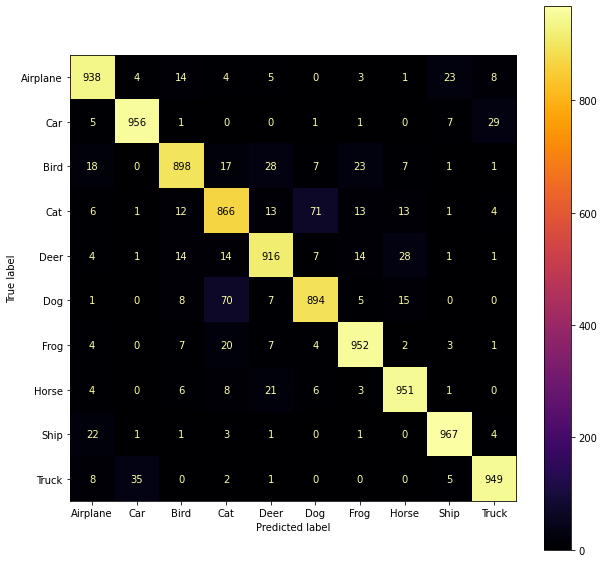

In [88]:
cm = confusion_matrix(ytest, ypred)
classes = ('Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xticklabels(classes)
disp = disp.plot(ax=ax,cmap='inferno')
plt.show()